In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/test'

In [ ]:
inception_v3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
inception_v3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
folders = glob('Datasets/train/*')
x = Flatten()(inception_v3.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=inception_v3.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
163/163 [==============================] - 139s 770ms/step - loss: 0.4095 - accuracy: 0.9091 - val_loss: 3.5493 - val_accuracy: 0.7917
Epoch 2/10
163/163 [==============================] - 124s 759ms/step - loss: 0.3394 - accuracy: 0.9166 - val_loss: 3839.8787 - val_accuracy: 0.6795
Epoch 3/10
163/163 [==============================] - 123s 756ms/step - loss: 0.3374 - accuracy: 0.9095 - val_loss: 88.5123 - val_accuracy: 0.7452
Epoch 4/10
163/163 [==============================] - 124s 757ms/step - loss: 0.1700 - accuracy: 0.9423 - val_loss: 0.2552 - val_accuracy: 0.8942
Epoch 5/10
163/163 [==============================] - 125s 765ms/step - loss: 0.1310 - accuracy: 0.9488 - val_loss: 0.4185 - val_accuracy: 0.8494
Epoch 6/10
163/163 [==============================] - 124s 762ms/step - loss: 0.1188 - accuracy: 0.9580 - val_loss: 0.6737 - val_accuracy: 0.8686
Epoch 7/10
163/163 [==============================] - 123s 756ms/step - loss: 0.1114 - accuracy: 0.9559 - val_loss: 0.20

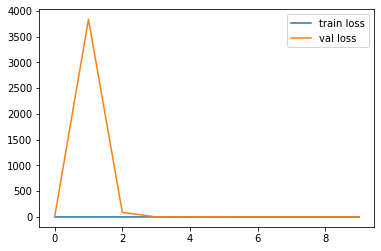

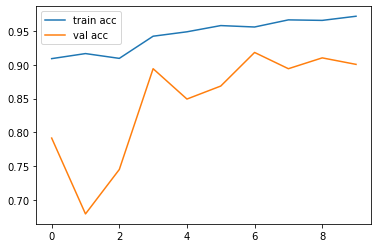

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
163/163 [==============================] - 126s 733ms/step - loss: 0.2040 - accuracy: 0.9252 - val_loss: 0.2530 - val_accuracy: 0.9119
Epoch 2/10
163/163 [==============================] - 116s 713ms/step - loss: 0.1466 - accuracy: 0.9536 - val_loss: 0.3330 - val_accuracy: 0.8894
Epoch 3/10
163/163 [==============================] - 117s 718ms/step - loss: 0.1250 - accuracy: 0.9548 - val_loss: 0.4850 - val_accuracy: 0.8830
Epoch 4/10
163/163 [==============================] - 116s 713ms/step - loss: 0.0884 - accuracy: 0.9632 - val_loss: 0.2750 - val_accuracy: 0.9054
Epoch 5/10
163/163 [==============================] - 117s 718ms/step - loss: 0.0913 - accuracy: 0.9670 - val_loss: 0.2952 - val_accuracy: 0.9167
Epoch 6/10
163/163 [==============================] - 116s 713ms/step - loss: 0.0809 - accuracy: 0.9689 - val_loss: 0.3768 - val_accuracy: 0.8926
Epoch 7/10
163/163 [==============================] - 116s 714ms/step - loss: 0.0661 - accuracy: 0.9753 - val_loss: 0.3109 -

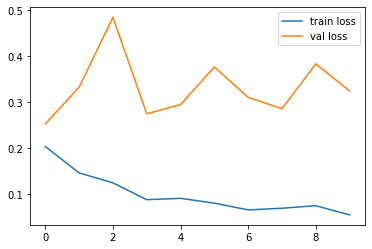

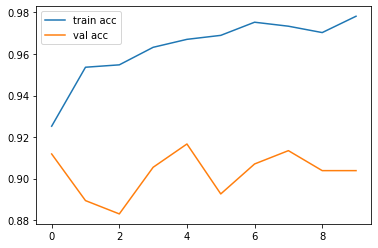

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
163/163 [==============================] - 119s 727ms/step - loss: 0.4048 - accuracy: 0.8842 - val_loss: 0.3572 - val_accuracy: 0.8686
Epoch 2/10
163/163 [==============================] - 118s 724ms/step - loss: 0.1277 - accuracy: 0.9492 - val_loss: 0.2836 - val_accuracy: 0.9071
Epoch 3/10
163/163 [==============================] - 119s 726ms/step - loss: 0.1235 - accuracy: 0.9511 - val_loss: 0.3193 - val_accuracy: 0.8990
Epoch 4/10
163/163 [==============================] - 118s 726ms/step - loss: 0.1116 - accuracy: 0.9578 - val_loss: 0.4709 - val_accuracy: 0.8622
Epoch 5/10
163/163 [==============================] - 118s 723ms/step - loss: 0.0954 - accuracy: 0.9630 - val_loss: 0.4666 - val_accuracy: 0.8574
Epoch 6/10
163/163 [==============================] - 117s 719ms/step - loss: 0.1140 - accuracy: 0.9592 - val_loss: 0.7218 - val_accuracy: 0.8333
Epoch 7/10
163/163 [==============================] - 121s 742ms/step - loss: 0.0798 - accuracy: 0.9676 - val_loss: 0.2571 -

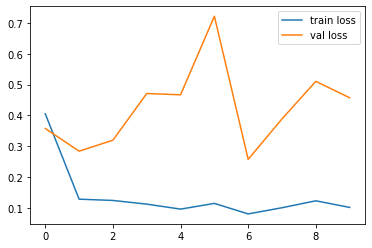

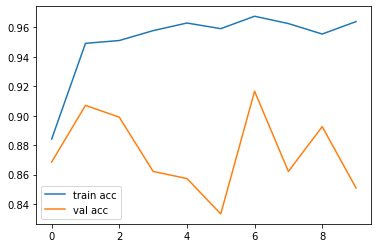

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')